<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

## *Data Science Unit 4 Sprint 4*

# Sprint Challenge
### RNNs, CNNs, GANS, and AutoML

In this Sprint Challenge, you'll explore some of the cutting edge of Data Science. *Caution* - these approaches can be pretty heavy computationally. All problems are designed to completed with 5-10 minutes of run time on most machines. If you approach takes longer, please double check your work. 

## Part 1 - RNNs

Use an RNN to fit a classification model on tweets to distinguish from tweets from any two accounts. The following code sample illustrates how to access data from an account (no API auth needed, uses [twitterscraper](https://github.com/taspinar/twitterscraper): 

In [1]:
!pip install twitterscraper

  Stored in directory: /root/.cache/pip/wheels/45/50/9b/70128bca07e2bf8b5ed3f504002e9e74a6eaa5e756341b6931
Successfully built twitterscraper


In [3]:
from twitterscraper import query_tweets

austen_tweets = query_tweets('from:austen',1000)
len(austen_tweets)

INFO: queries: ['from:austen since:2006-03-21 until:2006-11-16', 'from:austen since:2006-11-16 until:2007-07-14', 'from:austen since:2007-07-14 until:2008-03-10', 'from:austen since:2008-03-10 until:2008-11-06', 'from:austen since:2008-11-06 until:2009-07-04', 'from:austen since:2009-07-04 until:2010-03-01', 'from:austen since:2010-03-01 until:2010-10-27', 'from:austen since:2010-10-27 until:2011-06-25', 'from:austen since:2011-06-25 until:2012-02-20', 'from:austen since:2012-02-20 until:2012-10-17', 'from:austen since:2012-10-17 until:2013-06-14', 'from:austen since:2013-06-14 until:2014-02-10', 'from:austen since:2014-02-10 until:2014-10-08', 'from:austen since:2014-10-08 until:2015-06-05', 'from:austen since:2015-06-05 until:2016-01-31', 'from:austen since:2016-01-31 until:2016-09-28', 'from:austen since:2016-09-28 until:2017-05-26', 'from:austen since:2017-05-26 until:2018-01-21', 'from:austen since:2018-01-21 until:2018-09-18', 'from:austen since:2018-09-18 until:2019-05-17']
INFO

181

In [4]:
austen_tweets[0].text

'I love love love working with great people.pic.twitter.com/fCKOm6Vl'

Your Tasks:
* Select two twitter accounts to gather data from
* Use twitterscraper to get ~1,000 tweets from each account
* Encode the characters to a sequence of integers for the model
* Get the data into the appropriate shape/format, including labels and a train/test split
* Use Keras to fit a predictive model, classying tweets as being from one acount or the other
* Report your overall score and accuracy

For reference, the [Keras IMDB classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the RNN code we used in class.

Note - focus on getting a running model, not on making accuracy with extreme data size or epoch numbers. Fit a baseline model based on tweet text. Only revisit and push accuracy or incorporate additional features if you get everything else done!

In [5]:
# TODO - your code!
nader_tweets = query_tweets('from:dabit3',1000)
len(nader_tweets)

INFO: queries: ['from:dabit3 since:2006-03-21 until:2006-11-16', 'from:dabit3 since:2006-11-16 until:2007-07-14', 'from:dabit3 since:2007-07-14 until:2008-03-10', 'from:dabit3 since:2008-03-10 until:2008-11-06', 'from:dabit3 since:2008-11-06 until:2009-07-04', 'from:dabit3 since:2009-07-04 until:2010-03-01', 'from:dabit3 since:2010-03-01 until:2010-10-27', 'from:dabit3 since:2010-10-27 until:2011-06-25', 'from:dabit3 since:2011-06-25 until:2012-02-20', 'from:dabit3 since:2012-02-20 until:2012-10-17', 'from:dabit3 since:2012-10-17 until:2013-06-14', 'from:dabit3 since:2013-06-14 until:2014-02-10', 'from:dabit3 since:2014-02-10 until:2014-10-08', 'from:dabit3 since:2014-10-08 until:2015-06-05', 'from:dabit3 since:2015-06-05 until:2016-01-31', 'from:dabit3 since:2016-01-31 until:2016-09-28', 'from:dabit3 since:2016-09-28 until:2017-05-26', 'from:dabit3 since:2017-05-26 until:2018-01-21', 'from:dabit3 since:2018-01-21 until:2018-09-18', 'from:dabit3 since:2018-09-18 until:2019-05-17']
INFO

593

In [0]:
austen_tw = []
nader_tw = []
for tw in austen_tweets:
  austen_tw.append(tw.text)

for tw in nader_tweets:
  nader_tw.append(tw.text)

In [7]:
import pandas as pd
import numpy  as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [10]:
df1 = pd.DataFrame((austen_tw),columns=['tweet'])
df1['label'] = 0
df2 = pd.DataFrame((nader_tw),columns=['tweet'])
df2['label'] = 1

df1.shape == df2.shape

False

In [11]:
df1.shape

(181, 2)

In [13]:
df2.shape

(593, 2)

In [14]:
df = pd.concat([df1,df2],axis=0)
df.head()

,tweet,label
0,I love love love working with great people.pic...,0
1,Today for all-hands we watched a video of Aaro...,0
2,Other people who were creating wealth. And we ...,0
3,Sounds like by definition it's not a relative ...,0
4,Is the world more wealthy than it was 10 milli...,0


In [16]:
import nltk
import string
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def clean(tweet):
  
  tokens = word_tokenize(tweet)
  lowercase_tokens = [w.lower() for w in tokens]
  table = str.maketrans('','',string.punctuation)
  no_punctuation = [w.translate(table) for w in lowercase_tokens]
  alphabet = [word for word in no_punctuation if word.isalpha()]
  tokens = [w for w in alphabet if len(w)>1]

  return tokens

df['tweet'] = df['tweet'].apply(clean)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
max_f = 10000
max_len = 100
bs = 64

y_train = df['label'].values
x_train = df.drop(columns='label')

X_train, X_val, y_train, y_val = train_test_split(x_train,y_train,
                                                 test_size=0.2)
print(X_val.shape)
print(y_val.shape)

(155, 1)
(155,)


In [31]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

X_train.head()

,tweet
430,"[the, amplify, console, is, actually, simple, ..."
49,"[because, schools, are, already, failing, at, ..."
354,"[got, not, hotdog, join, the, adventure, http,..."
187,"[ve, done, this, but, more, like, offering, to..."
291,"[kentcdodds, hey, it, was, great, meeting, you..."


In [0]:
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_val = sequence.pad_sequences(X_val, maxlen=max_len)

In [44]:
model = Sequential()
model.add(Embedding(max_f, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=bs,
          epochs=5,
          )
# score, acc = model.evaluate(X_val, y_val,
#                             batch_size=bs)



Epoch 1/5


ValueError: ignored

In [0]:
# alright i do not know why this is happening but i have lost patience :) 

## Part 2 - CNNs
Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

In [46]:
!pip install google_images_download

     |████████████████████████████████| 911kB 6.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/22/f3/7b/d1d7a18d9784458622ef3f9702c0bdbc179b431adde169c1a0
Successfully built google-images-download


In [47]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {'keywords': "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)



Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 3.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 4.PKLS4116_inline.png
Image URL: http://images.animalpicturesociety.com/images/5d/alligator_animal_on_pond.jpg
Completed Image ====> 5.alligator_animal_on_pond.jpg

Errors: 0



At the time of writing at least a few do, but since the internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is validly run ResNet50 on the input images - don't worry about tuning or improving the model. 

*Hint:* ResNet 50 doesn't just return "frog". The three labels it has for frogs are bullfrog, tree frog, and tailed frog.

Stretch goal - also check for fish.

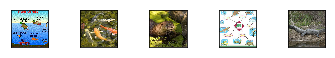

In [58]:
# TODO - your code!

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from PIL import Image, ImageOps  

image_path_list = absolute_image_paths[0]['animal pond']

def resize_image(filename, new_width=256, new_height=256):
  pil_image = Image.open(filename)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert('RGB')
  pil_image_rgb.save(filename, format='JPEG', quality=90)

for path in image_path_list:
  resize_image(path, 224, 224)
  
def show_images(image_path_list):
  plt.figure();
  for i, image_path in enumerate(image_path_list):
    plt.subplot(5,5, i+1)
    plt.imshow(np.asarray(Image.open(image_path)))
    plt.grid(False)
    plt.yticks([])
    plt.xticks([])
  plt.show()

show_images(image_path_list)


In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def interpret(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  return results

In [60]:
all_predictions = []
for i, image_path in enumerate(image_path_list):
  results = interpret(process_img_path(image_path))
  all_predictions.append(results)
  print(results)

40960/35363 [==================================] - 0s 2us/step
[('n06359193', 'web_site', 0.83354926), ('n04404412', 'television', 0.13649103), ('n04152593', 'screen', 0.0077335765)]
[('n01443537', 'goldfish', 0.5717821), ('n02536864', 'coho', 0.3270103), ('n01630670', 'common_newt', 0.021489784)]
[('n02444819', 'otter', 0.94315785), ('n02441942', 'weasel', 0.032673106), ('n02442845', 'mink', 0.018865377)]
[('n04243546', 'slot', 0.92180145), ('n04476259', 'tray', 0.024994105), ('n03908618', 'pencil_box', 0.016200861)]
[('n01698640', 'American_alligator', 0.5916904), ('n01737021', 'water_snake', 0.13532831), ('n01697457', 'African_crocodile', 0.07486636)]



## Part 3 - AutoML

Use [TPOT](https://epistasislab.github.io/tpot/) to fit a predictive model for the King County housing data, with `price` as the target output variable.

In [61]:
!pip install tpot

     |████████████████████████████████| 81kB 5.2MB/s 
     |████████████████████████████████| 942kB 14.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
  Stored in directory: /root/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
Successfully built stopit deap


In [62]:
import pandas as pd

url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv"
df = pd.read_csv(url)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


As with previous questions, your goal is to run TPOT and successfully run and report error at the end. Also, in the interest of time, feel free to choose small `generation=1`and `population_size=10` parameters, so your pipeline runs efficiently. You will want to be able to iterate and test. 

*Hint:* You will have to drop and/or type coerce at least a few variables to get things working. It's fine to err on the side of dropping to get things running - as long as you still get a valid model with reasonable predictive power. 

In [64]:
# TODO - your code!
from tpot import TPOTRegressor

df = df[df.columns.drop('id')]
df = df[df.columns.drop('date')]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [65]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price']).values
X_train, X_test, y_train, y_test = train_test_split(
    X, df['price'].values, train_size=0.80, test_size=0.20)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(17290, 18)
(4323, 18)
(17290,)


In [0]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [69]:
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generation 1 - Current best internal CV score: -16817181195.40018
Generation 2 - Current best internal CV score: -16817181195.40018
Generation 3 - Current best internal CV score: -16734687607.813503
Generation 4 - Current best internal CV score: -16734687607.813503
Generation 5 - Current best internal CV score: -16713381071.65712

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=8, min_child_weight=13, n_estimators=100, nthread=1, subsample=0.7500000000000001)
-11614827391.82647


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
preds=tpot.predict(X_test)
preds

array([618445.75, 654565.06, 665674.25, ..., 474290.2 , 503124.7 ,
       767079.25], dtype=float32)

## Part 4 - More... 

Answer the following questions, with a target audience of a fellow Data Scientist:
* What do you consider your strongest area as a Data Scientist? 

**TBH** i'm honestly not sure. I think my strongest area is probably visualizations and exploratory analysis, but I want my strongest area to be in model interpretability and pipeline development.

* What area of Data Science would you most like to learn more about and why?

I **LOVE** Computer Vision. I think it's the just right amount of complicated for somebody like me. Also because CV makes for interesting heuristics for self driving cars!

* Where do you think Data Science will be in 5 years? 

DS will still probably be DS in an even more broad generalization of all the cool stuff you can do with data and the many different avenues / specializations. I think that self-driving cars and autonomous services will be really popular, and I hope to be spearheading that in the future.

A few sentences per answer is fine. Only elaborate if time allows. Use markdown to format your answers.

Thank you for your hard, and congratulations!! You've learned a lot, and you should proudly call yourself a Data Scientist. 